In [1]:
# dependencies
import chardet
import pandas as pd
import os 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# API
import requests
import json

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, inspect, func


In [2]:
# Load in file
# Store filepath in a variable
YOUTUBE_PATH = "Resources/global_youtube.csv"

In [3]:
with open(YOUTUBE_PATH, 'rb') as csv_file:
    raw_content = csv_file.read()
    chardet_result = chardet.detect(raw_content)
print(chardet_result)

{'encoding': 'ISO-8859-1', 'confidence': 0.7289153199558486, 'language': ''}


In [4]:
# Read and display the CSV with Pandas
df = pd.read_csv(YOUTUBE_PATH, encoding=chardet_result['encoding'])
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [6]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 554 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     554 non-null    int64  
 1   Youtuber                                 554 non-null    object 
 2   subscribers                              554 non-null    int64  
 3   video views                              554 non-null    float64
 4   category                                 554 non-null    object 
 5   Title                                    554 non-null    object 
 6   uploads                                  554 non-null    int64  
 7   Country                                  554 non-null    object 
 8   Abbreviation                             554 non-null    object 
 9   channel_type                             554 non-null    object 
 10  video_views_rank                         554 non-null  

In [8]:
#pd.set_option('display.max_rows', None)  # Set the option to display all rows
#print(df)

In [9]:
# Rename specific columns
cleaned_df = df.rename(columns={
    'Gross tertiary education enrollment (%)': 'gross education enrollment percentage',
    'Youtuber': 'youtuber',
    'Title': 'title',
    'Abbreviation': 'abbreviation',
    'Country' : 'country',
    'Population': 'population',
    'Unemployment rate': 'unemployment_rate',
    'Urban_population' : 'urban_population',
    'Latitude' : 'latitude',
    'Longitude' : 'longitude',
    'video views' : 'video_views'
    })

# Display the DataFrame with renamed columns
cleaned_df.head()

,rank,youtuber,subscribers,video_views,category,title,uploads,country,abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,gross education enrollment percentage,population,unemployment_rate,urban_population,latitude,longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,100000.0,2016.0,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756


In [10]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 554 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   rank                                   554 non-null    int64  
 1   youtuber                               554 non-null    object 
 2   subscribers                            554 non-null    int64  
 3   video_views                            554 non-null    float64
 4   category                               554 non-null    object 
 5   title                                  554 non-null    object 
 6   uploads                                554 non-null    int64  
 7   country                                554 non-null    object 
 8   abbreviation                           554 non-null    object 
 9   channel_type                           554 non-null    object 
 10  video_views_rank                       554 non-null    float64
 11  country_ran

In [11]:
cleaned_df.to_csv('./Resources/database.csv', index=False)

In [12]:
file_path = './Resources/database.csv'  # Replace with the path to your CSV filed
df= pd.read_csv(file_path)

In [13]:
#create engine to sqlite file
engine = create_engine("sqlite:///Youtubedata.sqlite", echo=False)

In [14]:
df.to_sql("my_table", con=engine, if_exists='replace', index=False)

554

In [15]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [16]:
# Create a session
session = Session(engine)

In [17]:
#utilize inspector to confirm existance 
# INSPECT to confirm existence

# Create the inspector and connect it to the engine
inspector_gadget = inspect(engine)

# Collect the names of tables within the database
tables = inspector_gadget.get_table_names()

# print metadata for each table
for table in tables:
    print(table)
    print("-----------")
    
    # get columns
    columns = inspector_gadget.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])

    print()

my_table
-----------
rank BIGINT
youtuber TEXT
subscribers BIGINT
video_views FLOAT
category TEXT
title TEXT
uploads BIGINT
country TEXT
abbreviation TEXT
channel_type TEXT
video_views_rank FLOAT
country_rank FLOAT
channel_type_rank FLOAT
video_views_for_the_last_30_days FLOAT
lowest_monthly_earnings FLOAT
highest_monthly_earnings FLOAT
lowest_yearly_earnings FLOAT
highest_yearly_earnings FLOAT
subscribers_for_last_30_days FLOAT
created_year FLOAT
created_month TEXT
created_date FLOAT
gross education enrollment percentage FLOAT
population FLOAT
unemployment_rate FLOAT
urban_population FLOAT
latitude FLOAT
longitude FLOAT



In [18]:
query = """
SELECT DISTINCT country
FROM my_table
"""

# Execute the query and read the results into a DataFrame
df = pd.read_sql(text(query), con=engine)
df.head(25)

,country
0,India
1,United States
2,Russia
3,South Korea
4,Canada
5,Argentina
6,United Kingdom
7,Chile
8,Cuba
9,El Salvador


In [19]:
#1. Define the SQL query top channels by subscribers
query = """
SELECT Rank, Youtuber, subscribers, country, channel_type
FROM my_table
ORDER BY subscribers DESC
LIMIT 25
"""

# Execute the query and read the results into a DataFrame
df = pd.read_sql(text(query), con=engine)
df.head(25)

,rank,youtuber,subscribers,country,channel_type
0,1,T-Series,245000000,India,Music
1,3,MrBeast,166000000,United States,Entertainment
2,4,Cocomelon - Nursery Rhymes,162000000,United States,Education
3,5,SET India,159000000,India,Entertainment
4,9,Like Nastya,106000000,Russia,People
5,10,Vlad and Niki,98900000,United States,Entertainment
6,11,Zee Music Company,96700000,India,Music
7,12,WWE,96000000,United States,Sports
8,14,BLACKPINK,89800000,South Korea,Music
9,16,Sony SAB,83000000,India,Entertainment


In [20]:
#2. What are the top 25 YouTube channels by country?
# user inputs
user_country = 'All'
user_min_attempts = 0

# switch on user_region
if user_country == 'All':
    where_clause = "and 1=1"
else:
    where_clause = f"and country = '{user_country}'"

query = """
SELECT Rank, Youtuber, subscribers, country, channel_type, category
FROM my_table
GROUP BY country 
ORDER BY channel_type DESC
LIMIT 25
"""

# Execute the query and read the results into a DataFrame
df = pd.read_sql(text(query), con=engine)
df.head(25)

,rank,youtuber,subscribers,country,channel_type,category
0,424,FIFA,19400000,Switzerland,Sports,Sports
1,479,How Ridiculous,18000000,Australia,Sports,Sports
2,77,shfa2 - ï¿½ï¿½,39700000,United Arab Emirates,People,People & Blogs
3,9,Like Nastya,106000000,Russia,People,People & Blogs
4,72,Kimberly Loaiza,41300000,Mexico,People,People & Blogs
5,51,A4,46300000,Cuba,People,Gaming
6,40,Ed Sheeran,53500000,United Kingdom,Music,Music
7,260,netd mï¿½ï¿,24100000,Turkey,Music,Music
8,14,BLACKPINK,89800000,South Korea,Music,People & Blogs
9,900,DJ Khaled,13100000,Samoa,Music,Music


In [21]:
#3. What are the top 25 YouTube channels by the number of views?
query = """
SELECT Rank, Youtuber, subscribers, video_views, country, channel_type
FROM my_table
GROUP BY channel_type
ORDER BY video_views DESC
LIMIT 25
"""

# Execute the query and read the results into a DataFrame
df = pd.read_sql(text(query), con=engine)
df.head(25)

,rank,youtuber,subscribers,video_views,country,channel_type
0,1,T-Series,245000000,2.280000e+11,India,Music
1,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,United States,Education
2,9,Like Nastya,106000000,9.047906e+10,Russia,People
3,12,WWE,96000000,7.742847e+10,United States,Sports
4,30,Movieclips,59500000,5.931647e+10,United States,Film
5,3,MrBeast,166000000,2.836884e+10,United States,Entertainment
6,64,Shakira,43500000,2.756876e+10,Colombia,Howto
7,34,Aaj Tak,57600000,2.530775e+10,India,News
8,276,That Little Puff,23700000,2.028969e+10,United States,Animals
9,45,JuegaGerman,48100000,1.463171e+10,Chile,Games


In [22]:
#4. What categories will get the most views ?
query = """
SELECT rank, youtuber, subscribers, channel_type, category, country, SUM(video_views) AS total_views
FROM my_table
GROUP BY category
ORDER BY video_views DESC
LIMIT 25
"""

# Execute the query and read the results into a DataFrame
df = pd.read_sql(text(query), con=engine)
df.head(25)

,rank,youtuber,subscribers,channel_type,category,country,total_views
0,1,T-Series,245000000,Music,Music,India,1.937407e+12
1,4,Cocomelon - Nursery Rhymes,162000000,Education,Education,United States,6.107155e+11
2,5,SET India,159000000,Entertainment,Shows,India,4.379051e+11
3,9,Like Nastya,106000000,People,People & Blogs,Russia,7.634447e+11
4,12,WWE,96000000,Sports,Sports,United States,1.320809e+11
5,30,Movieclips,59500000,Film,Film & Animation,United States,3.899961e+11
6,3,MrBeast,166000000,Entertainment,Entertainment,United States,1.813469e+12
7,34,Aaj Tak,57600000,News,News & Politics,India,2.129565e+11
8,276,That Little Puff,23700000,Animals,Pets & Animals,United States,3.490263e+10
9,71,Ishtar Music,41400000,Music,Trailers,India,3.326272e+10


In [23]:
# 5. Which channels have the highest total video views?
query = """
SELECT category, channel_type, SUM(video_views) AS total_views
FROM my_table
GROUP BY channel_type
ORDER BY total_views DESC
LIMIT 25
"""

# Execute the query and read the results into a DataFrame
df = pd.read_sql(text(query), con=engine)
df.head(25)

,category,channel_type,total_views
0,Entertainment,Entertainment,2.357857e+12
1,Music,Music,2.177688e+12
2,Education,Education,6.851703e+11
3,People & Blogs,People,3.999484e+11
4,Gaming,Games,3.740156e+11
5,Film & Animation,Film,3.408723e+11
6,Comedy,Comedy,3.282831e+11
7,News & Politics,News,2.702165e+11
8,Sports,Sports,1.273575e+11
9,People & Blogs,Howto,8.598020e+10


In [24]:
# 6. What are the top 25 Youtube channels by upload
query = """
SELECT rank, youtuber, channel_type, uploads 
FROM my_table
ORDER BY uploads DESC
LIMIT 25
"""

# Execute the query and read the results into a DataFrame
df = pd.read_sql(text(query), con=engine)
df.head(25)

,rank,youtuber,channel_type,uploads
0,96,ABP NEWS,News,301308
1,858,GMA Integrated News,News,296272
2,748,TV9 Bharatvarsh,News,293516
3,34,Aaj Tak,News,283775
4,108,IndiaTV,News,273255
5,690,KOMPASTV,News,269050
6,587,Thairath Online,News,244899
7,503,News 24,News,211620
8,674,ABS-CBN News,News,209520
9,85,TEDx Talks,Nonprofit,200933


In [25]:
# 7. Channels with the highest yearly earnings
query = """
SELECT rank, youtuber, subscribers, category, country,  MAX(highest_yearly_earnings) AS highest_yearly_earnings
FROM my_table
GROUP BY youtuber
ORDER BY highest_yearly_earnings DESC
LIMIT 50;
"""

# Execute the query and read the results into a DataFrame
df = pd.read_sql(text(query), con=engine)
df.head(50)

,rank,youtuber,subscribers,category,country,highest_yearly_earnings
0,418,DaFuq!?Boom!,19600000,Film & Animation,United States,110600000.0
1,1,T-Series,245000000,Music,India,108400000.0
2,4,Cocomelon - Nursery Rhymes,162000000,Education,United States,94800000.0
3,5,SET India,159000000,Shows,India,87500000.0
4,22,Zee TV,70500000,Entertainment,India,81900000.0
5,140,StarPlus,32000000,Entertainment,India,80000000.0
6,16,Sony SAB,83000000,Shows,India,79600000.0
7,84,GR6 EXPLODE,38900000,Music,Brazil,78500000.0
8,799,ViralHog,14000000,People & Blogs,United States,65500000.0
9,3,MrBeast,166000000,Entertainment,United States,64700000.0


In [26]:
# 8. Calculate the average earnings per YouTuber:
query = """ 
SELECT 
    Youtuber,
    country,
    AVG((lowest_monthly_earnings + highest_monthly_earnings) / 2) AS avg_monthly_earnings,
    AVG((lowest_yearly_earnings + highest_yearly_earnings) / 2) AS avg_yearly_earnings
FROM my_table
WHERE rank <= 25
GROUP BY Youtuber, country
ORDER BY avg_yearly_earnings DESC;
"""
    
# Execute the query and read the results into a DataFrame
df = pd.read_sql(text(query), con=engine)
df.head(25)

,youtuber,country,avg_monthly_earnings,avg_yearly_earnings
0,T-Series,India,4782300.0,57600000.0
1,Cocomelon - Nursery Rhymes,United States,4196900.0,50350000.0
2,SET India,India,3877950.0,46500000.0
3,Zee TV,India,3613400.0,43500000.0
4,Sony SAB,India,3507150.0,42300000.0
5,MrBeast,United States,2868500.0,34350000.0
6,Zee Music Company,India,1700450.0,20500000.0
7,WWE,United States,1539350.0,18200000.0
8,HYBE LABELS,South Korea,1274750.0,15250000.0
9,Vlad and Niki,United States,1222550.0,14800000.0


In [27]:
# 9. Calculate the average earnings per country:
query = """ 
SELECT 
    country,
    AVG((lowest_monthly_earnings + highest_monthly_earnings) / 2) AS avg_monthly_earnings,
    AVG((lowest_yearly_earnings + highest_yearly_earnings) / 2) AS avg_yearly_earnings
FROM my_table
WHERE rank <= 25
GROUP BY country
ORDER BY avg_yearly_earnings DESC;
"""
    
# Execute the query and read the results into a DataFrame
df = pd.read_sql(text(query), con=engine)
df.head(25)

,country,avg_monthly_earnings,avg_yearly_earnings
0,India,3.063967e+06,3.685833e+07
1,United States,2.167290e+06,2.595000e+07
2,South Korea,8.982500e+05,1.075082e+07
3,Canada,3.747000e+05,4.514500e+06
4,Russia,1.040000e+05,1.223400e+06


In [28]:
# 10. Category with the most channels in the top 100 by subscribers:
query = """ 
SELECT rank, category, subscribers, COUNT(*) AS Channel_Count
FROM my_table
WHERE rank <= 100
GROUP BY category
ORDER BY Channel_Count DESC
LIMIT 10
"""
    
# Execute the query and read the results into a DataFrame
df = pd.read_sql(text(query), con=engine)
df.head(25)

,rank,category,subscribers,Channel_Count
0,1,Music,245000000,24
1,3,Entertainment,166000000,15
2,9,People & Blogs,106000000,9
3,4,Education,162000000,7
4,5,Shows,159000000,5
5,45,Gaming,48100000,4
6,30,Film & Animation,59500000,3
7,71,Trailers,41400000,2
8,12,Sports,96000000,2
9,79,Comedy,39200000,2


In [29]:
# 11. How do YouTube channels from different countries compare in terms of average subscribers and views?
query = """ 
SELECT rank, country, 
       AVG(subscribers) AS avg_subscribers,
       AVG(video_views) AS avg_video_views
FROM my_table
GROUP BY Country
ORDER BY avg_subscribers DESC, avg_video_views DESC """
    
# Execute the query and read the results into a DataFrame
df = pd.read_sql(text(query), con=engine)
df.head(25)

,rank,country,avg_subscribers,avg_video_views
0,51,Cuba,4.630000e+07,2.293663e+10
1,53,El Salvador,4.610000e+07,1.032339e+10
2,70,Barbados,4.190000e+07,2.247775e+10
3,14,South Korea,4.057500e+07,1.616908e+10
4,57,Pakistan,3.247500e+07,2.716291e+10
5,152,Venezuela,3.120000e+07,9.673649e+09
6,20,Canada,3.101667e+07,1.904904e+10
7,159,Kuwait,3.050000e+07,4.521574e+09
8,45,Chile,2.906667e+07,9.782519e+09
9,1,India,2.753957e+07,1.539299e+10


In [30]:
# 12. Channel type location latitude and longitude
query = """ SELECT 
    country,
    latitude, 
    longitude, 
    COUNT(channel_type) AS channel_count
FROM 
    my_table
GROUP BY 
    Latitude, 
    Longitude
ORDER BY 
    channel_count DESC
    """

# Execute the query and read the results into a DataFrame
df = pd.read_sql(text(query), con=engine)
df.head(25)

,country,latitude,longitude,channel_count
0,United States,37.090240,-95.712891,179
1,India,20.593684,78.962880,139
2,Brazil,-14.235004,-51.925280,33
3,United Kingdom,55.378051,-3.435973,26
4,Indonesia,-0.789275,113.921327,19
5,Mexico,23.634501,-102.552784,17
6,Thailand,15.870032,100.992541,13
7,Russia,61.524010,105.318756,13
8,Argentina,-38.416097,-63.616672,11
9,Spain,40.463667,-3.749220,11


In [31]:
# 13. Compare country youtuber's performace base on Population, Unemployment rate, Urban_population 
query = """
SELECT 
    country,
    population, 
    unemployment_rate, 
    urban_population, 
    COUNT(channel_type) AS channel_count
FROM 
    my_table
GROUP BY 
    country
ORDER BY 
    channel_count DESC
    """

# Execute the query and read the results into a DataFrame
df = pd.read_sql(text(query), con=engine)
df.head(25)

,country,population,unemployment_rate,urban_population,channel_count
0,United States,3.282395e+08,14.70,270663028.0,179
1,India,1.366418e+09,5.36,471031528.0,139
2,Brazil,2.125594e+08,12.08,183241641.0,33
3,United Kingdom,6.683440e+07,3.85,55908316.0,26
4,Indonesia,2.702039e+08,4.69,151509724.0,19
5,Mexico,1.260140e+08,3.42,102626859.0,17
6,Thailand,6.962558e+07,0.75,35294600.0,13
7,Russia,1.443735e+08,4.59,107683889.0,13
8,Spain,4.707678e+07,13.96,37927409.0,11
9,Argentina,4.493871e+07,9.79,41339571.0,11


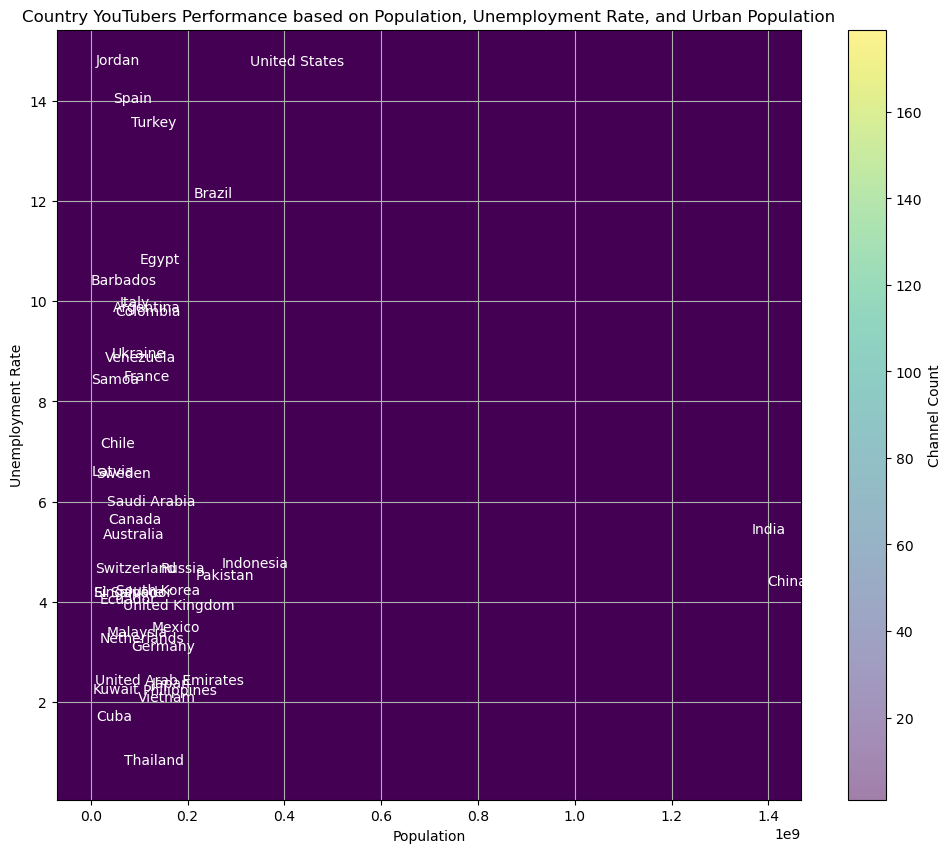

In [45]:
# Data from the SQL query
countries = df['country']
population = df['population']
unemployment_rate = df['unemployment_rate']
urban_population = df['urban_population']
channel_count = df['channel_count']

# Create the scatter plot
plt.figure(figsize=(12, 10))
scatter = plt.scatter(population, unemployment_rate, s=urban_population*8, c=channel_count, cmap='viridis', alpha=0.5)

# Add labels and title
plt.xlabel('Population')
plt.ylabel('Unemployment Rate')
plt.title('Country YouTubers Performance based on Population, Unemployment Rate, and Urban Population')

# Add country labels with black color
for i, country in enumerate(countries):
    plt.text(population[i], unemployment_rate[i], country, color='white')

# Add a colorbar legend for the number of channels
plt.colorbar(scatter, label='Channel Count')

plt.grid(True)
plt.show()

In [ ]:
# close the engine
engine.dispose()